In [129]:
import numpy as np
from hmmlearn import hmm

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

import matplotlib.pyplot as plt

In [130]:
raw = pd.read_csv('tr_eikon_eod_data.csv', index_col = 0, parse_dates = True)
raw

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,182.170000,98.390,50.71,1663.15,221.54,271.00,2717.07,17.33,1.1702,1265.00,22.01,119.89
2018-06-26,184.430000,99.080,49.67,1691.09,221.58,271.60,2723.06,15.92,1.1645,1258.64,21.95,119.26
2018-06-27,184.160000,97.540,48.76,1660.51,220.18,269.35,2699.63,17.91,1.1552,1251.62,21.81,118.58


In [131]:
stock_prices = raw['AAPL.O'].dropna().to_numpy()
stock_prices

array([ 30.57282657,  30.62568366,  30.13854129, ..., 184.16      ,
       185.5       , 185.11      ])

In [132]:
train_data, test_data = np.split(stock_prices, 2)

In [133]:
train_data

array([30.57282657, 30.62568366, 30.13854129, ..., 76.67706618,
       77.37849405, 77.50706535])

In [134]:
test_data

array([ 76.96992303,  75.97420974,  74.78135379, ..., 184.16      ,
       185.5       , 185.11      ])

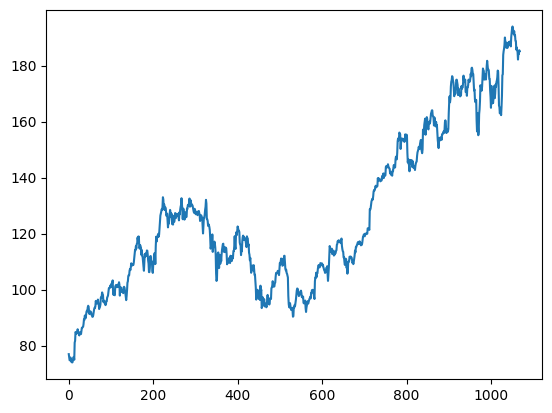

In [135]:
plt.plot(test_data)

In [136]:
def predict_position(train, test):
    # Train Hidden Markov Model
    model = hmm.GaussianHMM(n_components=2, covariance_type="diag", n_iter=1000)
    model.fit(train.reshape(-1, 1))

    # Predict hidden states for test data
    hidden_states = model.predict(test.reshape(-1, 1))

    # Define a function to map hidden states to rise or fall
    def map_to_rise_or_fall(state):
        return "Rise" if state == 0 else "Fall"

    # Map hidden states to rise or fall
    predicted_rise_fall = np.array(list(map(map_to_rise_or_fall, hidden_states)))

    return predicted_rise_fall

In [137]:
prediction = predict_position(test_data, train_data)
prediction

array(['Rise', 'Rise', 'Rise', ..., 'Rise', 'Rise', 'Rise'], dtype='<U4')

In [161]:
def trade(balance, test, prediction):
    position = 0

    for today in range(len(test) - 1):
        tomorrow = today + 1
        if prediction[tomorrow] == "Rise":
            balance += (1 - position) * test[today]
        else:
            balance -= (position + 1) * test[today]
    
    balance += position * test[-1]

    return balance

In [162]:
trade(0, test_data, prediction)

134781.0219357998

In [195]:
def run_simulation(train, test):
    N = 10000
    profit = 0
    for _ in range(N):
        prediction = predict_position(test_data, train_data)
        profit += trade(0, train, prediction)
    return profit / N

In [196]:
run_simulation(train_data, test_data)

13309.636577601681

In [126]:
# Generate some example data
num_days = 100
num_stocks = 5
stock_prices = pd.read_csv('tr_eikon_eod_data.csv', parse_dates=True)
#stock_prices = stock_prices[['AAPL.O', 'MSFT.O', 'INTC.O', 'AMZN.O', 'GS.N']].dropna().to_numpy()
stock_prices = stock_prices['AAPL.O'].dropna().to_numpy()
stock_prices = stock_prices.reshape(-1, 1)
stock_prices = pd.DataFrame(stock_prices)

data = pd.read_csv('tr_eikon_eod_data.csv', parse_dates=True)
data = data[['AAPL.O', 'MSFT.O', 'INTC.O', 'AMZN.O', 'GS.N']]

# data = np.log(data / data.shift(1))
# data.dropna(inplace=True)

#  Split the data into training and testing sets
#train_data, test_data = train_test_split(stock_prices, test_size=0.2, random_state=42)
train_data, test_data = stock_prices[:1069], stock_prices[1069:]


test_data = data['GS.N'].dropna().to_numpy()
test_data = test_data.reshape(-1, 1)
test_data = pd.DataFrame(test_data)

# Define and train the HMM model
model = hmm.GaussianHMM(n_components=2, covariance_type="full", n_iter=100)
model.fit(train_data)

# Predict states for test data
predicted_states = model.predict(test_data)

# Initialize variables
current_balance = 0
position = None
transaction_cost = 0.01  # Assuming a transaction cost of 1%
value = 0

# Function to calculate profit based on transaction type
def calculate_profit(transaction_type, price, change = False):
    global current_balance, position, value
    price = float(price)
    if transaction_type == "buy":
        if change :
            position = "long" 
            current_balance -= price*value
        current_balance -= 100*price  # Buying for $100
    elif transaction_type == "sell":
        if change : 
            position = "short" 
            current_balance += price*value
        current_balance += 100*price  # Selling short for $100
    
    if change : 
        value = 100
    else :
        value += 100


# # Simulate transactions and calculate profit
# print(predicted_states.reshape(-1,1).ndim)
# print(test_data.to_numpy().ndim)
# print(np.hstack([predicted_states.reshape(-1,1), test_data.to_numpy()]))
        
for state, price in np.hstack([predicted_states.reshape(-1,1), test_data.to_numpy()]):
    print(state, price)
    try :
        price = float(price)
    except :
        continue
    print(price)
    if state == 0:  # Buy
        if position == "long":  # No position, buy
            calculate_profit("buy", price)
        if position == "short" or position is None:  # No position, buy
            calculate_profit("buy", price, True)
    else:  # Sell (short)
        if position == "short":  # Shorting when there's a position
            calculate_profit("sell", price)
        if position == "long" or position is None:  # Shorting when there's a position
            calculate_profit("sell", price, True)
    print(current_balance)

# Calculate final profit
multiplier = 0
if position == "long" :
    multiplier = 1
else :
    multiplier = -1
    
print(value, position)
final_balance = current_balance + test_data.iloc[-1, 0] * value * multiplier

print(f"Final balance: ${final_balance:.2f}")

1.0 173.08
173.08
17308.0
1.0 176.14
176.14
34922.0
1.0 174.26
174.26
52348.0
1.0 177.67
177.67
70115.0
1.0 174.31
174.31
87546.0
1.0 171.56
171.56
104702.0
1.0 167.82
167.82
121484.0
1.0 169.07
169.07
138391.0
1.0 168.53
168.53
155244.0
1.0 165.21
165.21
171765.0
1.0 166.86
166.86
188451.0
1.0 167.79
167.79
205230.0
1.0 160.87
160.87
221317.0
1.0 154.12
154.12
236729.0
1.0 154.98
154.98
252227.0
1.0 150.88
150.88
267315.0
1.0 151.5
151.5
282465.0
1.0 153.29
153.29
297794.0
1.0 148.72
148.72
312666.0
1.0 153.13
153.13
327979.0
1.0 156.94
156.94
343673.0
1.0 157.23
157.23
359396.0
1.0 150.68
150.68
374464.0
1.0 154.16
154.16
389880.0
1.0 151.1
151.1
404990.0
1.0 152.49
152.49
420239.0
1.0 153.63
153.63
435602.0
1.0 154.05
154.05
451007.0
1.0 153.93
153.93
466400.0
1.0 157.4
157.4
482140.0
1.0 157.26
157.26
497866.0
1.0 155.73
155.73
513439.0
1.0 156.18
156.18
529057.0
1.0 156.71
156.71
544728.0
1.0 156.7
156.7
560398.0
1.0 158.33
158.33
576231.0
1.0 156.44
156.44
591875.0
1.0 156.35
156

In [197]:
import numpy as np
from hmmlearn import hmm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# Generate some example data
np.random.seed(42)
num_days = 100
num_stocks = 5
stock_prices = pd.read_csv('tr_eikon_eod_data.csv', parse_dates=True)
#stock_prices = stock_prices[['AAPL.O', 'MSFT.O', 'INTC.O', 'AMZN.O', 'GS.N']].dropna().to_numpy()
stocks = ['AAPL.O', 'MSFT.O', 'INTC.O', 'AMZN.O', 'GS.N']
stock_prices = stock_prices[['AAPL.O', 'MSFT.O', 'INTC.O', 'AMZN.O', 'GS.N']].dropna().to_numpy()
stock_prices = stock_prices.reshape(-1, 1)
stock_prices = pd.DataFrame(stock_prices)



data = pd.read_csv('tr_eikon_eod_data.csv', parse_dates=True)
data = data[['AAPL.O', 'MSFT.O', 'INTC.O', 'AMZN.O', 'GS.N']]

# Initialize variables
current_balance = 0
position = None
value = 0

# Function to calculate profit based on transaction type
def calculate_profit(transaction_type, price, change = False):
    global current_balance, position, value
    price = float(price)
    if transaction_type == "buy":
        if change :
            position = "long"  
            current_balance -= price*value
        current_balance -= 100*price  # Buying for $100
    elif transaction_type == "sell":
        if change : 
            position = "short" 
            current_balance += price*value
        current_balance += 100*price  # Selling short for $100
    
    if change : 
        value = 100
    else :
        value += 100

def calculate(predicted_states, test_data) :
  global position, value, current_balance
  position = None
  value = 0
  current_balance = 0

  temp = np.hstack([predicted_states.reshape(-1,1), test_data.to_numpy()])
  for state, price in temp :
    try :
        price = float(price)
    except :
        continue
    if state == 0:  # Buy
        if position == "long":  # No position, buy
            calculate_profit("buy", price)
        if position == "short" or position is None:  # No position, buy
            calculate_profit("buy", price, True)
    else:  # Sell (short)
        if position == "short":  # Shorting when there's a position
            calculate_profit("sell", price)
        if position == "long" or position is None:  # Shorting when there's a position
            calculate_profit("sell", price, True)
    

for i in stocks :
  stock_prices = pd.read_csv('tr_eikon_eod_data.csv', parse_dates=True)
  stock_prices = stock_prices[i].dropna().to_numpy()
  stock_prices = stock_prices.reshape(-1, 1)
  stock_prices = pd.DataFrame(stock_prices)
  print(i)
  
  train_data = stock_prices
  test_data = stock_prices

  model = hmm.GaussianHMM(n_components=2, covariance_type="full", n_iter=100)
  model.fit(train_data)

  total = 0

  for j in stocks :
    test_data = data[j].dropna().to_numpy()
    test_data = test_data.reshape(-1, 1)
    test_data = pd.DataFrame(test_data)

    predicted_states = model.predict(test_data)

    calculate(predicted_states, test_data)

    multiplier = 0
    if position == "long" :
        multiplier = 1
    else :
        multiplier = -1
        
    final_balance = current_balance + test_data.iloc[-1, 0] * value * multiplier
    total += final_balance
    print(i, j, final_balance)
  print(total)

AAPL.O
AAPL.O AAPL.O 2785336.11919369
AAPL.O MSFT.O -9643526.54
AAPL.O INTC.O -4349933.8100000005
AAPL.O AMZN.O 260537955.53
AAPL.O GS.N 10760583.0
260090414.29919368
MSFT.O
MSFT.O AAPL.O -18480337.94308033
MSFT.O MSFT.O -4122069.5600000005
MSFT.O INTC.O 1202066.8100000005
MSFT.O AMZN.O -260694624.53
MSFT.O GS.N -10765638.0
-292860603.22308034
INTC.O
INTC.O AAPL.O -19580172.009076867
INTC.O MSFT.O -7824598.54
INTC.O INTC.O -889608.6699999999
INTC.O AMZN.O -260694624.53
INTC.O GS.N -10765638.0
-299754641.74907684
AMZN.O
AMZN.O AAPL.O 19595631.012128867
AMZN.O MSFT.O 11555651.54
AMZN.O INTC.O 4349933.8100000005
AMZN.O AMZN.O -39585160.47
AMZN.O GS.N 10765638.0
6681693.89212887
GS.N
GS.N AAPL.O -19595631.012128867
GS.N MSFT.O -11555651.54
GS.N INTC.O -4349933.8100000005
GS.N AMZN.O -58015119.91
GS.N GS.N -8482081.0
-101998417.27212887
